In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sb
from matplotlib import pyplot as plt
from tabular_data import load_airbnb
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
data=pd.read_csv('tabular_data/clean_tabular_data.csv')

In [9]:
data.head(5)

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,...,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
0,0,AAA,Treehouses,Red Kite Tree Tent - Ynys Affalon,[ Escape to one of these two fabulous Tree Ten...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2.0,1.0,1.0,...,4.6,4.7,4.3,5.0,4.3,4.3,13.0,https://www.airbnb.co.uk/rooms/26620994?adults...,1.0,NaN
1,1,AAB,Treehouses,Az Alom Cabin - Treehouse Tree to Nature Cabin,[ Come and spend a romantic stay with a couple...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3.0,3.0,1.0,...,4.3,4.7,4.6,4.9,4.7,4.5,8.0,https://www.airbnb.co.uk/rooms/27055498?adults...,1.0,NaN
2,2,AAC,Treehouses,Cabane Entre Les Pins\n🌲🏕️🌲,"[ Rustic cabin between the pines, 3 meters hig...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4.0,2.0,1.5,...,4.2,4.6,4.8,4.8,4.8,4.7,51.0,https://www.airbnb.co.uk/rooms/51427108?adults...,1.0,NaN
3,3,AAD,Treehouses,Tree Top Cabin with log burner & private hot tub,[ The Tree top cabin is situated in our peacef...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2.0,1.0,1.0,...,4.8,4.9,4.9,4.9,5.0,4.6,23.0,https://www.airbnb.co.uk/rooms/49543851?adults...,1.0,NaN
4,5,AAE,Treehouses,Treehouse near Paris Disney,"[ Charming cabin nestled in the leaves, real u...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4.0,3.0,1.0,...,5.0,4.9,5.0,4.7,5.0,4.7,32.0,https://www.airbnb.co.uk/rooms/935398?adults=1...,2.0,NaN


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            829 non-null    int64  
 1   ID                    829 non-null    object 
 2   Category              829 non-null    object 
 3   Title                 829 non-null    object 
 4   Description           829 non-null    object 
 5   Amenities             829 non-null    object 
 6   Location              829 non-null    object 
 7   guests                829 non-null    float64
 8   beds                  829 non-null    float64
 9   bathrooms             829 non-null    float64
 10  Price_Night           829 non-null    float64
 11  Cleanliness_rating    829 non-null    float64
 12  Accuracy_rating       829 non-null    float64
 13  Communication_rating  829 non-null    float64
 14  Location_rating       829 non-null    float64
 15  Check-in_rating       8

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'guests'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'Price_Night'}>,
        <AxesSubplot:title={'center':'Cleanliness_rating'}>,
        <AxesSubplot:title={'center':'Accuracy_rating'}>,
        <AxesSubplot:title={'center':'Communication_rating'}>],
       [<AxesSubplot:title={'center':'Location_rating'}>,
        <AxesSubplot:title={'center':'Check-in_rating'}>,
        <AxesSubplot:title={'center':'Value_rating'}>,
        <AxesSubplot:title={'center':'amenities_count'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'Unnamed: 19'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

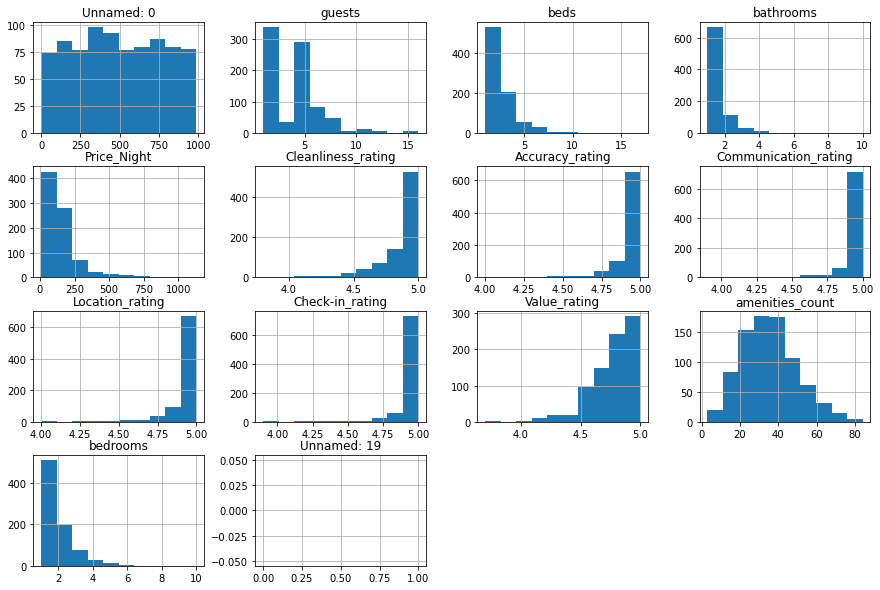

In [11]:
data.hist(figsize=(15, 10))

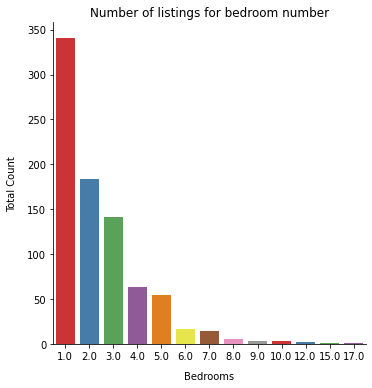

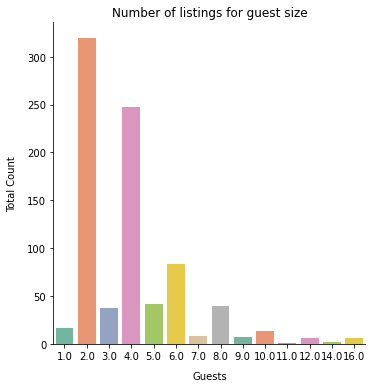

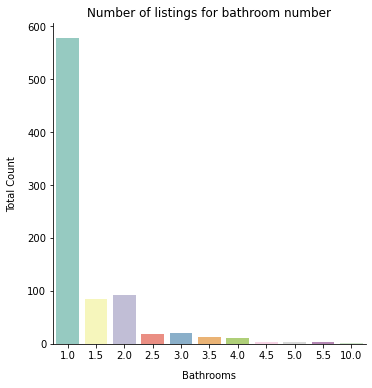

In [12]:
# Number of listings for each guest_number
uni_guests = data['guests'].unique()
len(data['guests'].unique())

# Number of listings for each beds_number
uni_beds= data['beds'].unique()
len(data['beds'].unique())

# Number of listings for each bathroom_number
uni_bathrooms =data['bathrooms'].unique()
len(data['bathrooms'].unique())

# Visualise distribution of properties by bedrooms, guests and bathrooms
sb.catplot(x = "beds", data = data, kind = 'count', palette= "Set1").set(title='Number of listings for bedroom number').set_axis_labels("Bedrooms", "Total Count", labelpad=10)
sb.catplot(x="guests", data = data, kind = 'count', palette= "Set2").set(title='Number of listings for guest size').set_axis_labels("Guests", "Total Count", labelpad=10)
sb.catplot(x="bathrooms", data = data, kind = 'count', palette= "Set3").set(title='Number of listings for bathroom number').set_axis_labels("Bathrooms", "Total Count", labelpad=10)

# First

Already we can see that the modal number of bedrooms is 1 by a large margin. Then followed by 2 and 3 bedrooms. And we can see that the number of guest numbers is over represented at even numbers (2, 4, 6 and 8).

This could be due to mutiple reasons but most obvious reasons would be that the Airbnb hosts would advertise per bedroom 2 guests, and/or each bedroom
generally has a double bed that accommdate 2 people.

The most common number of bathrooms is overwhelmingly 1. The half unit of bathrooms represent toilet/sink only bathrooms wihtout shower/bath facilities.


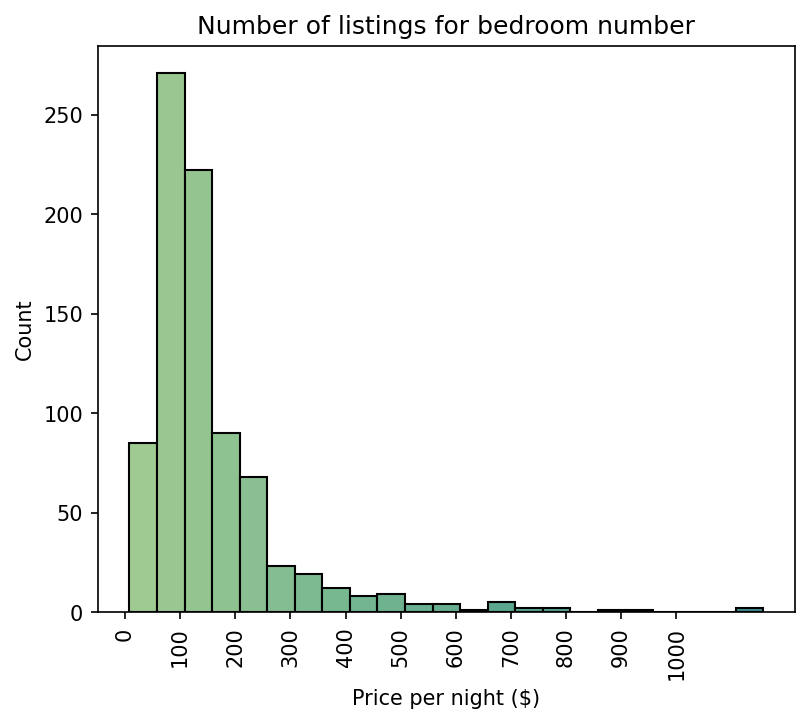

In [13]:
# Visualise data by Price per Night
xtick_labels =[]
max_price = data['Price_Night'].max()
num_x_ticks = max_price/100
for i in range(int(num_x_ticks)):
    xtick_labels.append((100*i))
    i +=1
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
cm = sb.color_palette("crest", 50)
plot = sb.histplot(x="Price_Night", data = data, binwidth=50)
plot.set(title='Number of listings for bedroom number', xticks=xtick_labels)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.xticks(rotation=90)
plt.xlabel('Price per night ($)')
plt.show()

In [15]:
# Pull up basic stats of all datapoints
column_name = ["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count","Price_Night"]
for column in column_name:
    mean = data[[column]].mean()
    median = data[[column]].median()
    minimum = data[[column]].min()
    maximum = data[[column]].max()
    print()
    print(f"""These are the basic stats for {column} column: 
    The mean is {mean.to_string(index=False)}.
    The median is {median.to_string(index=False)}.
    The minimum is {minimum.to_string(index=False)}.
    The maximum is {maximum.to_string(index=False)}.""")
    print()


These are the basic stats for guests column: 
    The mean is 3.911942.
    The median is 4.0.
    The minimum is 1.0.
    The maximum is 16.0.


These are the basic stats for beds column: 
    The mean is 2.420989.
    The median is 2.0.
    The minimum is 1.0.
    The maximum is 17.0.


These are the basic stats for bathrooms column: 
    The mean is 1.384198.
    The median is 1.0.
    The minimum is 1.0.
    The maximum is 10.0.


These are the basic stats for Cleanliness_rating column: 
    The mean is 4.8538.
    The median is 4.9.
    The minimum is 3.8.
    The maximum is 5.0.


These are the basic stats for Accuracy_rating column: 
    The mean is 4.906031.
    The median is 4.9.
    The minimum is 4.0.
    The maximum is 5.0.


These are the basic stats for Communication_rating column: 
    The mean is 4.933534.
    The median is 5.0.
    The minimum is 3.9.
    The maximum is 5.0.


These are the basic stats for Location_rating column: 
    The mean is 4.904946.
    The med

Create basic connections btw data by use heatmap analysis

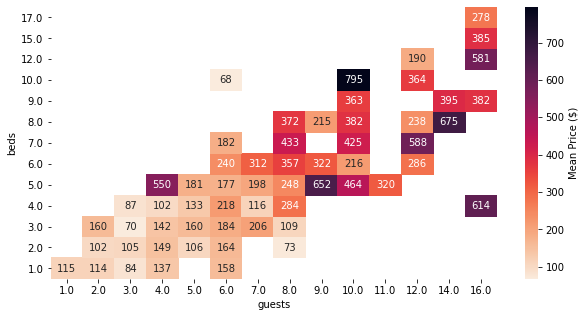

In [17]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(data.groupby(['beds', 'guests'], sort=True).Price_Night.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'Mean Price ($)'})
ax.invert_yaxis()
# The darker the colour of the square, the higher the price.

Text(0.5, 0, 'Number of beds')

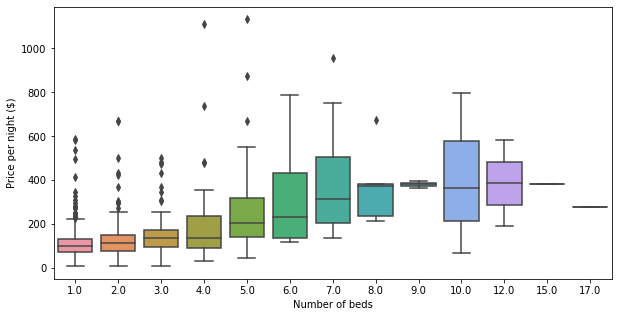

In [19]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(10,5))
sb.boxplot(x='beds', y='Price_Night', data=data[['beds', 'Price_Night']])
plt.ylabel('Price per night ($)')
plt.xlabel('Number of beds')

Some additional impressions

We can see that there is a large range in price per night for most number of beds.

The reasons can be many but some possible explanations could be that for the lower numbers of bed, the quality and location is a big source of variation.

However, for the large numbers of beds, where much of the price per night overlaps with the smaller properties, it is likely that these listings are of a
dormatory types where a large number of people sleep in a single bedroom that has many beds.


<AxesSubplot:xlabel='beds', ylabel='guests'>

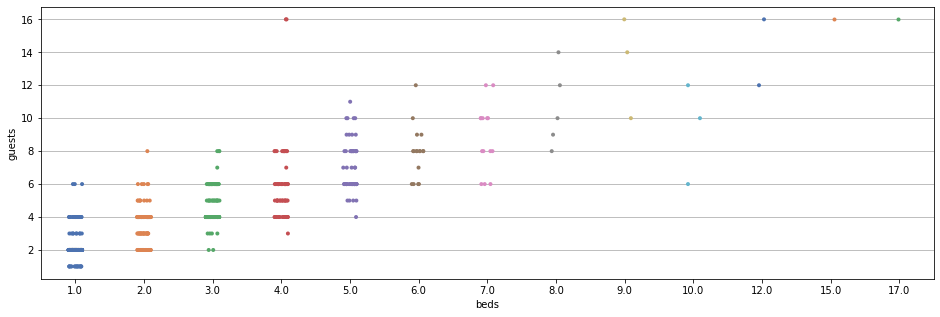

In [26]:
# Plotting a swarmplot to visually see the number of listings for each number of guests and the no. bedrooms
plt.figure(figsize=(16,5))
plt.grid()
sorted_list=data
sorted_list['beds'].astype(int).sort_values(inplace=True)
sorted_list['guests'].astype(int).sort_values(inplace=True)
sb.stripplot(x='beds', y='guests', data=sorted_list[['beds','guests']], size = 4, palette="deep")

# Summary

From these datasets, we can confirm these general facts about the dataset:

1. The most common features of a property in the dataset are 1 bedroom, 2 guests, and 1 bathroom.
2. There appears to be a general trend of price per night with number of beds, and guests but the trend is not robust at higher numbers of beds. 
   There propertys typically have a large range of prices.